<a href="https://colab.research.google.com/github/GilbertHD/HD2103/blob/main/HD_07_YOLO_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### YOLO(You Only Look Once)

https://pjreddie.com/darknet/yolo/

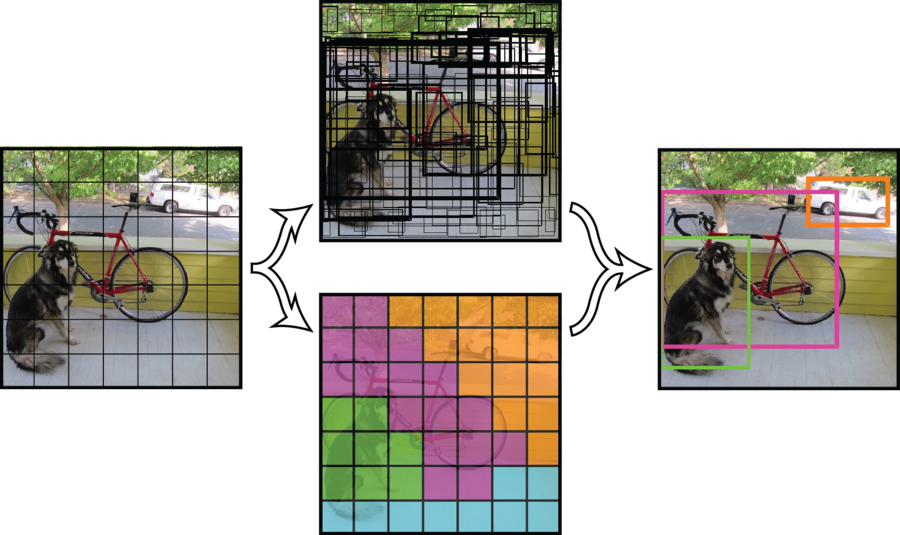

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

In [ ]:
from urllib.request import urlretrieve
urlretrieve('https://pjreddie.com/media/files/yolov3.weights','yolov3.weights')

('yolov3.weights', <http.client.HTTPMessage at 0x7f570f76cc10>)

In [ ]:
from urllib.request import urlretrieve
urlretrieve('https://pjreddie.com/media/files/yolov3-tiny.weights','yolov3-tiny.weights')

('yolov3-tiny.weights', <http.client.HTTPMessage at 0x7f5710f0da10>)

In [ ]:
!mv yolov3.weights gdrive/My\ Drive/CV/Object\ Detection_YOLO/
print('yolov3.weights move complete!!')
!mv yolov3-tiny.weights gdrive/My\ Drive/CV/Object\ Detection_YOLO/
print('yolov3-tiny.weights move complete!!')

yolov3.weights move complete!!
yolov3-tiny.weights move complete!!


In [ ]:
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5931, done.
remote: Total 5931 (delta 0), reused 0 (delta 0), pack-reused 5931
Receiving objects: 100% (5931/5931), 6.34 MiB | 31.53 MiB/s, done.
Resolving deltas: 100% (3924/3924), done.


In [ ]:
!cp darknet/cfg/yolov3.cfg gdrive/My\ Drive/CV/Object\ Detection_YOLO/
print('yolov3.cfg copy complete!!')
!cp darknet/cfg/yolov3-tiny.cfg gdrive/My\ Drive/CV/Object\ Detection_YOLO/
print('yolov3-tiny.cfg copy complete!!')
!cp darknet/data/coco.names gdrive/My\ Drive/CV/Object\ Detection_YOLO/
print('coco.names copy complete!!')

yolov3.cfg copy complete!!
yolov3-tiny.cfg copy complete!!
coco.names copy complete!!


In [ ]:
!rm -r darknet

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
print("OpenCV version:")
print(cv2.__version__)

OpenCV version:
4.1.2


In [ ]:
min_confidence = 0.5

In [ ]:
net = cv2.dnn.readNet("gdrive/My Drive/CV/Object Detection_YOLO/yolov3.weights",
 "gdrive/My Drive/CV/Object Detection_YOLO/yolov3.cfg")
classes = [] # detection 할 Object(Class) list 배열을 정의
with open("gdrive/My Drive/CV/Object Detection_YOLO/coco.names", "r") as f:
 # 80개의 Object(class)를 구분할 수 있는 Object의 이름을 classes 배열에 넣어준다.
 classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
# Object 마다 컬러를 하나씩 다르게 지정
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [ ]:
img = cv2.imread("gdrive/My Drive/CV/Object Detection_YOLO/image/image/bike.jpg")
img = cv2.resize(img, None, fx=0.7, fy=0.7)
height, width, channels = img.shape

#### Original Image ####


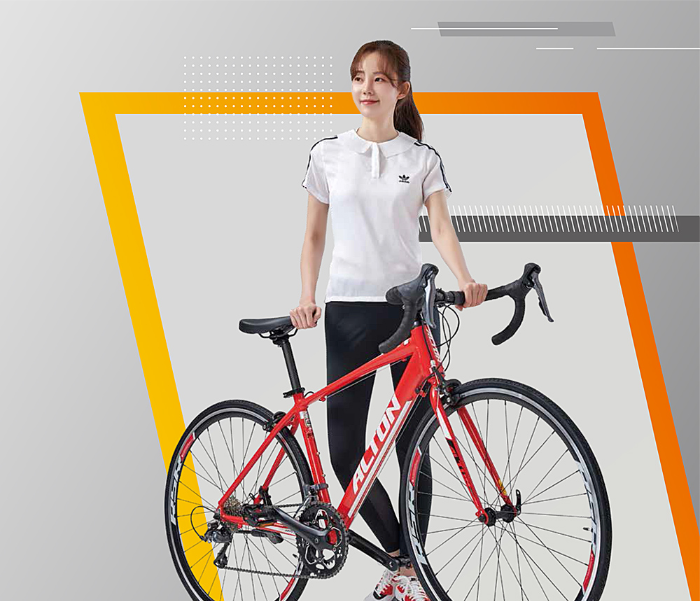

In [ ]:
print("#### Original Image ####")
cv2_imshow(img)

0 person
1 bicycle


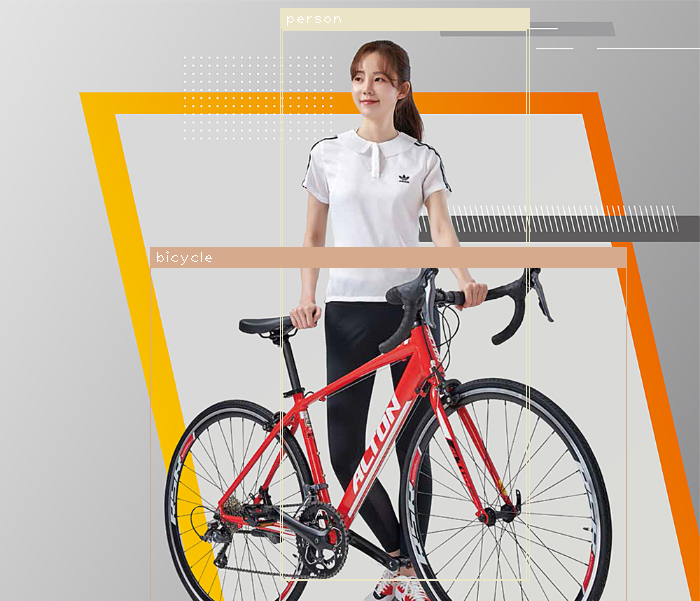

In [ ]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers) # outs 에는 detection 된 Object 들이 들어 있습니다. 

class_ids = [] # detection 한 Class id를 저장하는 배열 정의
confidences = [] # detection 한 Class 의 신뢰도(확률)를 저장하는 배열 정의
boxes = [] # detection 한 boxing 정보를 저장하는 배열 정의

for out in outs:
    for detection in out:
      scores = detection[5:]
      class_id = np.argmax(scores) # detection 한 Class id
      confidence = scores[class_id] # detection 한 Class 의 신뢰도(확률)
      if confidence > min_confidence:
        # Object detected
        center_x = int(detection[0] * width)
        center_y = int(detection[1] * height)
        w = int(detection[2] * width)
        h = int(detection[3] * height)
        # Rectangle coordinates
        x = int(center_x - w / 2)
        y = int(center_y - h / 2)
        boxes.append([x, y, w, h]) # boxing 정보를 boxes 배열에 저장
        confidences.append(float(confidence)) # 신뢰도(확률)을 confidences 배열에 저장
        class_ids.append(class_id) # Class id 를 class_ids 배열에 저장

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
 # 박스안에 박스(노이즈)를 하나로 만들어 준다. 
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes: # 노이즈가 제거된 박스만 표시해 준다.
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]]) # Class 이름
        print(i, label)
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)
        cv2.rectangle(img, (x, y - 20), (x + w, y), color, -1)
        cv2.putText(img, label, (x + 5, y - 5), font, 1, (255, 255, 255), 1)
cv2_imshow(img)

### How to train YOLOvx on the custom dataset

https://thebinarynotes.com/how-to-train-yolov3-custom-dataset/